## import the libraries

In [30]:
import numpy as np
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

Loading BokehJS ...

In [1]:
import streamlit as st

In [5]:
df = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/dataset_tk.csv')
df_long = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/long_data_.csv')

In [6]:
df

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [7]:
df["Date"]=df["Unnamed: 0"]
df['Date'] = pd.to_datetime(df.Date, dayfirst=True)
df = df.drop(["Unnamed: 0"], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
Punjab               503 non-null float64
Haryana              503 non-null float64
Rajasthan            503 non-null float64
Delhi                503 non-null float64
UP                   503 non-null float64
Uttarakhand          503 non-null float64
HP                   503 non-null float64
J&K                  503 non-null float64
Chandigarh           503 non-null float64
Chhattisgarh         503 non-null float64
Gujarat              503 non-null float64
MP                   503 non-null float64
Maharashtra          503 non-null float64
Goa                  503 non-null float64
DNH                  503 non-null float64
Andhra Pradesh       503 non-null float64
Telangana            503 non-null float64
Karnataka            503 non-null float64
Kerala               503 non-null float64
Tamil Nadu           503 non-null float64
Pondy                503 non-null float64
Bihar        

In [12]:
df['NR'] = df['Punjab']+ df['Haryana']+ df['Rajasthan']+ df['Delhi']+df['UP']+df['Uttarakhand']+df['HP']+df['J&K']+df['Chandigarh']
df['WR'] = df['Chhattisgarh']+df['Gujarat']+df['MP']+df['Maharashtra']+df['Goa']+df['DNH']
df['SR'] = df['Andhra Pradesh']+df['Telangana']+df['Karnataka']+df['Kerala']+df['Tamil Nadu']+df['Pondy']
df['ER'] = df['Bihar']+df['Jharkhand']+ df['Odisha']+df['West Bengal']+df['Sikkim']
df['NER'] =df['Arunachal Pradesh']+df['Assam']+df['Manipur']+df['Meghalaya']+df['Mizoram']+df['Nagaland']+df['Tripura']

In [13]:
df_line = pd.DataFrame({"Northern Region": df["NR"].values,
                        "Southern Region": df["SR"].values,
                        "Eastern Region": df["ER"].values,
                        "Western Region": df["WR"].values,
                        "North Eastern Region": df["NER"].values},index=df.Date)

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


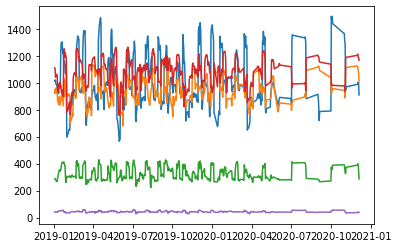

In [31]:
plt.plot(df_line)

In [47]:


df_line.plot_bokeh(kind="line",title ="India - Power Consumption Regionwise",
                   figsize =(800,600),
                   xlabel = "Date",
                   ylabel="MU(millions of units)")
                   

Figure(id='13169', ...)

In [49]:
df_line.plot_bokeh(kind="bar",title ="India - Power Consumption Regionwise",figsize =(800,600),xlabel = "Date",ylabel="MU(millions of units)")

Figure(id='13850', ...)

In [51]:
df_line.plot_bokeh(kind="hist",title ="India - Power Consumption Regionwise",
                   figsize =(800,600),
                   xlabel = "Date",
                   ylabel="MU(millions of units)")
                

Figure(id='14292', ...)

In [45]:
df_line = pd.DataFrame({"Northern Region": df["NR"].values,
                        "Southern Region": df["SR"].values,
                        "Eastern Region": df["ER"].values,
                        "Western Region": df["WR"].values,
                        "North Eastern Region": df["NER"].values},index=df.Date)

df_line.plot_bokeh(kind="line",title ="India - Power Consumption Regionwise",
                   figsize =(1000,800),
                   xlabel = "Date",
                   ylabel="MU(millions of units)",rangetool=True)
                   

Column(id='11824', ...)